# <h> Question 1 </h>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [4]:

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

In [5]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
print("w:", w.shape)
print("b:", b.shape)
print(y_train.shape)

w: (3072, 10)
b: (10,)
(50000, 10)


In [8]:
batch_size = Ntr
iterations =300
lr = 1.4e-2
lr_decay=0.9999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

In [9]:
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w)+b
    loss =1./batch_size *np.square(y_pred-y).sum()+reg*np.sum(w**2)
    loss_history.append(loss)
    if t%10 == 0:
        print('iteration %d / %d: loss %f'%(t,iterations,loss))
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    db = dy_pred.sum(axis=0)
    dw = x.T.dot(dy_pred)+reg*w
    w-=lr*dw
    b-=lr*db
    lr*=lr_decay

iteration 0 / 300: loss 1.000014
iteration 10 / 300: loss 0.876441
iteration 20 / 300: loss 0.842108
iteration 30 / 300: loss 0.823043
iteration 40 / 300: loss 0.811765
iteration 50 / 300: loss 0.804805
iteration 60 / 300: loss 0.800309
iteration 70 / 300: loss 0.797250
iteration 80 / 300: loss 0.795053
iteration 90 / 300: loss 0.793386
iteration 100 / 300: loss 0.792059
iteration 110 / 300: loss 0.790959
iteration 120 / 300: loss 0.790017
iteration 130 / 300: loss 0.789191
iteration 140 / 300: loss 0.788454
iteration 150 / 300: loss 0.787787
iteration 160 / 300: loss 0.787178
iteration 170 / 300: loss 0.786618
iteration 180 / 300: loss 0.786099
iteration 190 / 300: loss 0.785617
iteration 200 / 300: loss 0.785166
iteration 210 / 300: loss 0.784743
iteration 220 / 300: loss 0.784346
iteration 230 / 300: loss 0.783971
iteration 240 / 300: loss 0.783616
iteration 250 / 300: loss 0.783280
iteration 260 / 300: loss 0.782960
iteration 270 / 300: loss 0.782656
iteration 280 / 300: loss 0.782

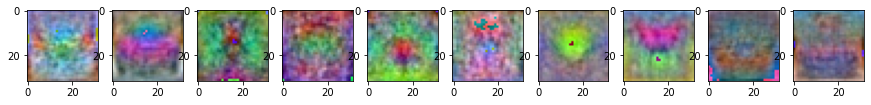

Initial Rate: 0.01358621708897951
Training Loss: 0.7818469822012155


In [50]:
f,ax = plt.subplots(1,10)
f.set_size_inches(15,15)
for i in range(10):
    sample = w[:,i].reshape(32,32,3)
    correctd = 255/(sample.max()-sample.min())*sample+255-sample.max()*(255/sample.max()-sample.min())

    ax[i].imshow((correctd).astype(np.uint8))
plt.show()
print('Initial Rate:',lr)
print('Training Loss:',loss_history[-1])


In [31]:
batch_size_test = Nte
y_eval =x_test.dot(w)+b
loss_test =1./batch_size_test *np.square(y_eval-y_test).sum()
print('Testing loss:',loss_test)

Testing loss: 0.787080872283579


# Question 2

In [ ]:
H = 200
std = 1e-6
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H,K)
